In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import scipy.stats as ss
from scipy.interpolate import interp1d
from scipy.special import expit
from fractions import Fraction
from empiricaldist import Pmf, Cdf
import matplotlib.pyplot as plt
from collections import Counter
import statsmodels.formula.api as smfa

In [2]:
from data.utils import update_dice

In [3]:
coin = Pmf()
coin['heads'] = Fraction(1, 2)
coin['tails'] = Fraction(1, 2)
coin

,probs
heads,1/2
tails,1/2


In [4]:
dice = Pmf.from_seq([1, 2, 3, 4, 5, 6])
dice, dice([1, 4, 7])

(1    0.166667
 2    0.166667
 3    0.166667
 4    0.166667
 5    0.166667
 6    0.166667
 Name: , dtype: float64,
 array([0.16666667, 0.16666667, 0.        ]))

In [9]:
# Pmf클래스는 pandas의 시리즈를 상속받는 형태
# 단 함수처럼 사용하면 결과가 오류가 아닌 0이 나옴
letters = Pmf.from_seq(list('Mississippi'))
letters, letters['s'], letters('M'), letters('k'), letters(['s', 'M', 'k'])

(M    0.090909
 i    0.363636
 p    0.181818
 s    0.363636
 Name: , dtype: float64,
 0.36363636363636365,
 0.09090909090909091,
 0,
 array([0.36363636, 0.09090909, 0.        ]))

In [20]:
prior = Pmf.from_seq(['B1', 'B2'])
# 여기에 list 대신 pandas 시리즈로 넣어줌으로써 아래에서 1 - likelihood_vanilla 형태로 계산 가능
likelihood_vanilla = pd.Series([0.75, 0.5], index=['B1', 'B2'])
posterior = prior * likelihood_vanilla
posterior.normalize()
posterior

,probs
B1,0.6
B2,0.4


In [21]:
posterior *= likelihood_vanilla
posterior.normalize()
posterior

,probs
B1,0.692308
B2,0.307692


In [22]:
posterior *= (1 - likelihood_vanilla)
posterior.normalize()
posterior

,probs
B1,0.529412
B2,0.470588


In [24]:
hypos = np.arange(101)
# Pmf(prob, index)
prior = Pmf(1, hypos)
prior.normalize()
prior

,probs
0,0.009901
1,0.009901
2,0.009901
3,0.009901
4,0.009901
...,...
96,0.009901
97,0.009901
98,0.009901
99,0.009901


In [27]:
likelihood_vanilla = hypos / 100
likelihood_chocolate = 1 - likelihood_vanilla
likelihood_vanilla[:10], likelihood_chocolate[:10]

(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]),
 array([1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91]))

In [29]:
posterior1 = prior * likelihood_vanilla
posterior1.normalize()
posterior1.head(10)

,probs
0,0.000000
1,0.000198
2,0.000396
3,0.000594
4,0.000792
5,0.000990
6,0.001188
7,0.001386
8,0.001584
9,0.001782


In [30]:
posterior2 = posterior1 * likelihood_vanilla
posterior2.normalize()
posterior2.head(10)

,probs
0,0.000000
1,0.000003
2,0.000012
3,0.000027
4,0.000047
5,0.000074
6,0.000106
7,0.000145
8,0.000189
9,0.000239


In [31]:
posterior3 = posterior2 * likelihood_chocolate
posterior3.normalize()
posterior3.head(10)

,probs
0,0.000000
1,0.000012
2,0.000047
3,0.000105
4,0.000184
5,0.000285
6,0.000406
7,0.000547
8,0.000707
9,0.000885


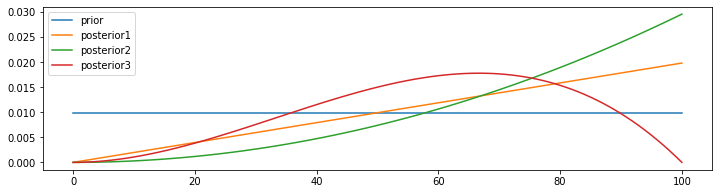

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
prior.plot(label='prior', ax=ax)
posterior1.plot(label='posterior1', ax=ax)
posterior2.plot(label='posterior2', ax=ax)
posterior3.plot(label='posterior3', ax=ax)
plt.legend()
plt.show()

In [33]:
# MAP 추정량
posterior1.max_prob(), posterior2.max_prob(), posterior3.max_prob()

(100, 100, 67)

In [34]:
hypos = np.array([6, 8, 12])
prior = Pmf(1, hypos)
prior.normalize()
# qs속성(quantities)은 index, ps속성은 probability
prior.qs, prior.ps

(array([ 6,  8, 12], dtype=int64), array([0.33333333, 0.33333333, 0.33333333]))

In [35]:
likelihood1 = np.array([1/6, 1/8, 1/12])
likelihood2 = np.array([0, 1/8, 1/12])
likelihood3 = np.array([0, 0, 1/12])

In [36]:
posterior1 = prior * likelihood1
posterior1.normalize()
posterior2 = posterior1 * likelihood2
posterior2.normalize()
posterior2

,probs
6,0.000000
8,0.692308
12,0.307692


In [37]:
posterior1 = update_dice(prior.copy(), 1)
posterior2 = update_dice(posterior1, 7)
posterior2

,probs
6,0.000000
8,0.692308
12,0.307692
